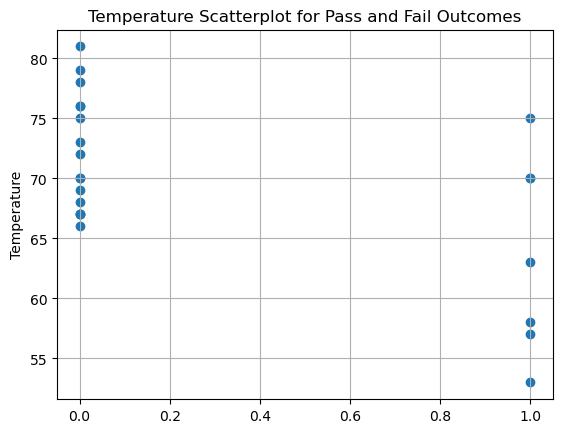

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/hanachen/Desktop/SYS 2001/data.halex_A.2.xlsx"  
df = pd.read_excel(file_path)

import matplotlib.pyplot as plt

y = [66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53, 67, 75, 70, 81, 76, 79, 75, 76, 58]
x = [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]

plt.title("Temperature Scatterplot for Pass and Fail Outcomes")
plt.ylabel("Temperature")
plt.grid(True)
plt.scatter(x, y)
plt.show()


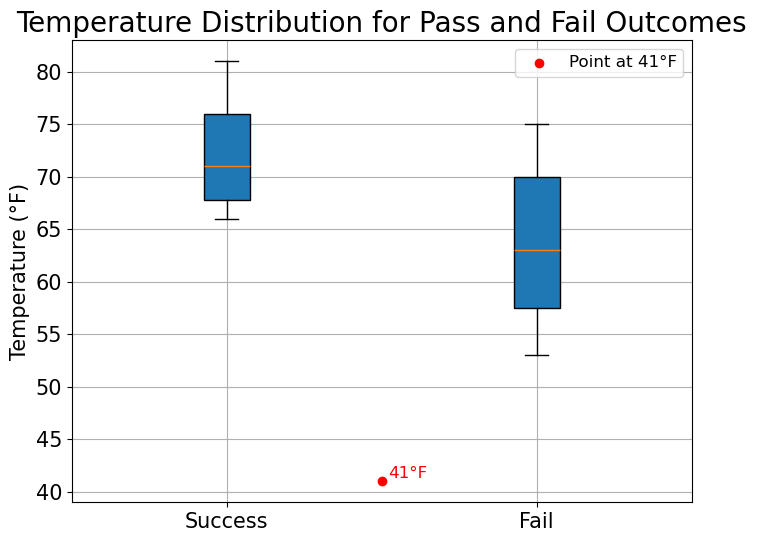

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

x_values = [66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53, 67, 75, 70, 81, 76, 79, 75, 76, 58]
y_values = [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]

df = pd.DataFrame({'X': x_values, 'Y': y_values})

x_group_0 = df[df['Y'] == 0]['X']
x_group_1 = df[df['Y'] == 1]['X']

plt.figure(figsize=(8, 6))
plt.boxplot([x_group_0, x_group_1], labels=['Success', 'Fail'], patch_artist=True)

plt.title("Temperature Distribution for Pass and Fail Outcomes", fontsize=20)
plt.ylabel("Temperature (°F)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

plt.scatter(1.5, 41, color='red', label="Point at 41°F", zorder=3)
plt.text(1.52, 41, "41°F", fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')

plt.legend(fontsize=12)
plt.show()


In [18]:
import numpy as np

fail_min = np.min(x_group_0)
fail_max = np.max(x_group_0)
fail_median = np.median(x_group_0)

success_min = np.min(x_group_1)
success_max = np.max(x_group_1)
success_median = np.median(x_group_1)

print(f"Fail Group:")
print(f"- Min Temperature: {fail_min}°F")
print(f"- Max Temperature: {fail_max}°F")
print(f"- Median Temperature: {fail_median}°F\n")

print(f"Success Group:")
print(f"- Min Temperature: {success_min}°F")
print(f"- Max Temperature: {success_max}°F")
print(f"- Median Temperature: {success_median}°F")


Fail Group:
- Min Temperature: 66°F
- Max Temperature: 81°F
- Median Temperature: 71.0°F

Success Group:
- Min Temperature: 53°F
- Max Temperature: 75°F
- Median Temperature: 63.0°F


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

x_values = [66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53, 67, 75, 70, 81, 76, 79, 75, 76, 58]
y_values = [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]

df = pd.DataFrame({'X': x_values, 'Y': y_values})

X = df[["X"]] 
y = df["Y"] 

model = LogisticRegression()
model.fit(X, y)

new_temp = pd.DataFrame([[41]], columns=["X"])  
prob_pass = model.predict_proba(new_temp)[0][1]

print(f"Probability of failing at 41 degrees: {prob_pass:.2f}")


Probability of passing at 41 degrees: 1.00


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


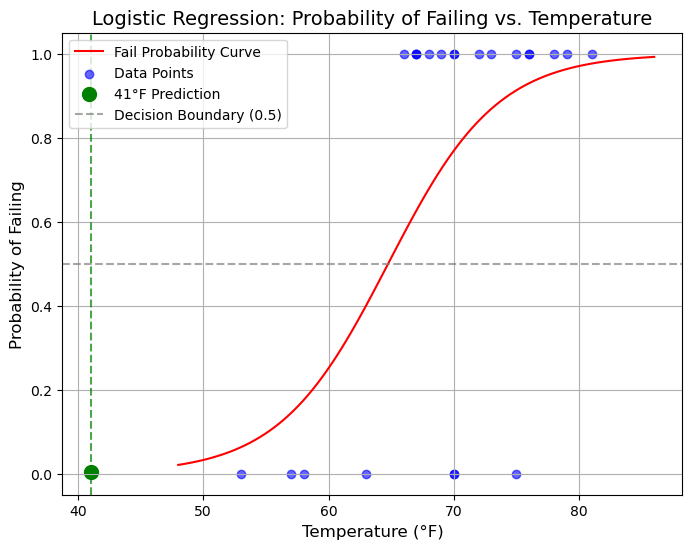

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

x_values = [66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53, 67, 75, 70, 81, 76, 79, 75, 76, 58]
y_values = [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]  # 1 = Fail, 0 = Pass

df = pd.DataFrame({'X': x_values, 'Y': y_values})

X = df[["X"]]  
y = df["Y"]  

model = LogisticRegression()
model.fit(X, y)

temp_range = np.linspace(min(x_values) - 5, max(x_values) + 5, 100).reshape(-1, 1)

prob_fail = model.predict_proba(temp_range)[:, 1]

new_temp = pd.DataFrame([[41]], columns=["X"])  
prob_fail_41 = model.predict_proba(new_temp)[0][1]

plt.figure(figsize=(8, 6))
plt.plot(temp_range, prob_fail, label="Fail Probability Curve", color='red')
plt.scatter(x_values, y_values, color='blue', label="Data Points", alpha=0.6)

plt.scatter([41], [prob_fail_41], color='green', s=100, label="41°F Prediction")

plt.xlabel("Temperature (°F)", fontsize=12)
plt.ylabel("Probability of Failing", fontsize=12)
plt.title("Logistic Regression: Probability of Failing vs. Temperature", fontsize=14)
plt.axhline(0.5, color='gray', linestyle="--", alpha=0.7, label="Decision Boundary (0.5)")
plt.axvline(41, color='green', linestyle="--", alpha=0.7)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()
